In [1]:
# Importamos librería  del GOES
import lib.libGOES

import netCDF4
import datetime

import numpy as np
import matplotlib.pyplot as plt

## Descargamos imágen satélital

Descargaremos el producto "ABI-L1b-RadC" que corresponde a la radiación en el dominio de CONUS.<br>
Para algunos productos es necesario especificar en que banda se requieren, en este caso descargaré la banda 3. <br>
La lista con  productos adicionales se puede encontrar en https://docs.opendata.aws/noaa-goes16/cics-readme.html

In [2]:
lib.libGOES.datosActualesGOES16(
                                producto="ABI-L1b-RadC" ,
                                banda   = 3 ,
                                output_name= "b03.nc"
                               )

Descargar completa.


## Abrimos el archivo 

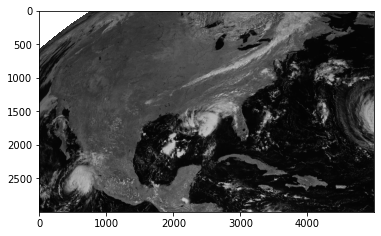

In [3]:
nc    = netCDF4.Dataset("b03.nc")
array = nc.variables["Rad"]

plt.imshow(array,cmap="gray")

## Obtenemos la hora en la que fue tomada la imágen.

Podemos pedir a la función que nos devuelva la hora en formato string o en un objeto tipo datetime. <br>
Dado que la fecha se retorna en hora UTC es más facil modificicarla cuando es retornada como datetime. <br>


In [4]:
fecha = lib.libGOES.obtenerFecha_GOES(nc,return_datetime=True)
fecha

datetime.datetime(2021, 9, 8, 17, 12, 37, 741673)

In [5]:
# Pondremos la hora en hora local restando 5 horas a la hora UTC.

fecha_local = fecha - datetime.timedelta(hours=5)
fecha_local

datetime.datetime(2021, 9, 8, 12, 12, 37, 741673)

In [6]:
# Obtenemos un string con la fecha local.

formato   = "%d %b %Y  %H:%M:%S MXC"
str_fecha =fecha_local.strftime(formato)

print(f"Hora y día en que fue tomada la imágen satélital :{str_fecha}")

Hora y día en que fue tomada la imágen satélital :08 Sep 2021  12:12:37 MXC


## Encontramos unas coordenadas en la imágen

La banda 3 resalta en color obscuro la superficie del agua, por ello ubicaremos el lago de chapala en la imágen.<br>

Las coordenadas del centro del lago son aproximadamente 20.269 , -103.070

Coordenadas en pixeles:  902 2456


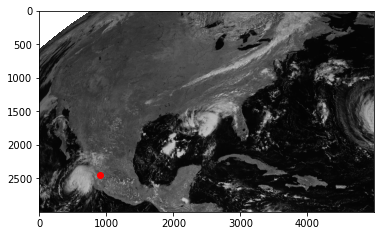

In [7]:
# Obtenemos las coordenadas en pixeles.
px_x, px_y = lib.libGOES.coordinates2px_GOES(nc,latitud=20.269,longitud=-103.070)
print("Coordenadas en pixeles: " ,px_x,px_y)

# Mostramos en la imágen.
plt.imshow(array,cmap="gray")
plt.scatter(px_x,px_y,c="red")

## Cortamos y centramos la imágen en el lago.

Text(1.0, 1.0, '08 Sep 2021  12:12:37 MXC')

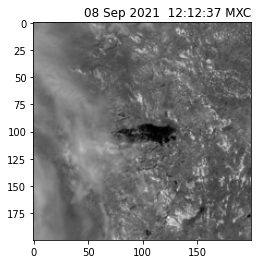

In [9]:
array_r = lib.libGOES.cortarYcentrar_GOES(array,px_x,px_y,ventana=100)
plt.imshow(array_r,cmap="gray")
plt.title(str_fecha,loc="right")